Codifique un script que reciba como parámetro el nombre de un archivo de texto, tokenize y calcule y escriba a un archivo los pares (#términos totales procesados, #términos únicos). Verifique en qué medida satisface la ley de Heaps. Grafique en la notebook los ajustes variando los parámetros de la expresión. Puede inicialmente probar con los archivos de los puntos anteriores.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Parámetros de la Ley de Heaps: k = 9.3370, b = 0.6445


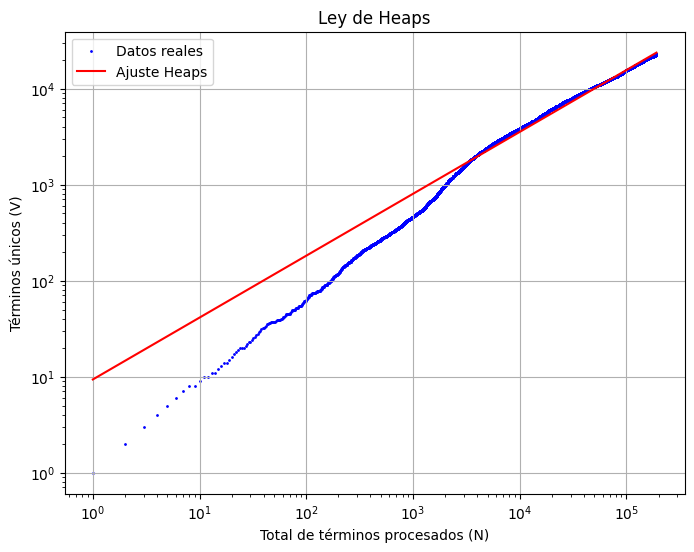

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

def sacar_acentos(texto):
    texto = re.sub(r"[áàäâã]", "a", texto)
    texto = re.sub(r"[éèëê]", "e", texto)
    texto = re.sub(r"[íìïî]", "i", texto)
    texto = re.sub(r"[óòöôõ]", "o", texto)
    texto = re.sub(r"[úùüû]", "u", texto)
    return texto

def procesar(texto):
    stop_words = set(stopwords.words("spanish"))
    
    texto = texto.lower()  # Convertir a minusculas
    texto = sacar_acentos(texto)
    texto = re.sub(r"[^a-zñ\s]", "", texto)  # Eliminar caracteres especiales
    tokens = texto.split()  # Tokenizar (En este caso separo por espacios)
    tokens_filtrados = [token for token in tokens if token not in stop_words]
    
    return tokens_filtrados

def calcular_ley_heaps(valores_N, valores_V):
    log_N = np.log(valores_N)
    log_V = np.log(valores_V)

    coeficientes = np.polyfit(log_N, log_V, 1)  
    b = coeficientes[0]  # Pendiente
    k = np.exp(coeficientes[1])  # Ordenada en escala logarítmica

    return k, b

def main(file):
    with open(file, 'r', encoding='utf-8') as file:
        texto = file.read().lower() 

    tokens = procesar(texto) 

    valores_N = []  # Terminos totales procesados
    valores_V = []  # Terminos unicos
    vocabulario = set() 
    for i, palabra in enumerate(tokens, start=1):  
        vocabulario.add(palabra)  
        valores_N.append(i)  
        valores_V.append(len(vocabulario))  

    with open('resultados.txt', 'w', encoding='utf-8') as file:
        file.write("Terminos totales procesados, Terminos unicos\n")
        for n, v in zip(valores_N, valores_V):
            file.write(f"{n}, {v}\n")

    k, b = calcular_ley_heaps(valores_N, valores_V)
    print(f"Parametros de la Ley de Heaps: k = {k:.4f}, b = {b:.4f}")
    
    unicos = k * np.array(valores_N) ** b # Ley de Heaps (V(N) = k ⋅ N^b)
    
    plt.figure(figsize=(8,6))
    plt.scatter(valores_N, valores_V, label="Datos reales", color="blue", s=1)
    plt.plot(valores_N, unicos, label="Ajuste Heaps", color="red")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Total de términos procesados (N)")
    plt.ylabel("Términos únicos (V)")
    plt.legend()
    plt.title("Ley de Heaps")
    plt.grid(True)
    plt.show()

nltk.download('stopwords')
# Ejecutar el script con un archivo de texto
main('quijote.txt')
    



